## 1. Overview

The main goal of the credit card companies should be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The transactions are classified as fradulent and non-fradulent transactions.

## 2. Importing libraries for EDA

In [34]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Reading the credit card csv

In [8]:
credit_card_data = pd.read_csv("./CC.csv")
credit_card_data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observation

he dataset contains only numerical data. Features V1, V2 to V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

## 4. Shape of the data

In [9]:
print(credit_card_data.shape)
print(list(credit_card_data.columns))

(284807, 32)
['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


## 5. Checking for null values in the dataset

In [13]:
credit_card_data.isnull().any().sum()

0

### Observation
The dataset contains no null values as PCA is performed on the dataset 

## 6. Correlation Matrix

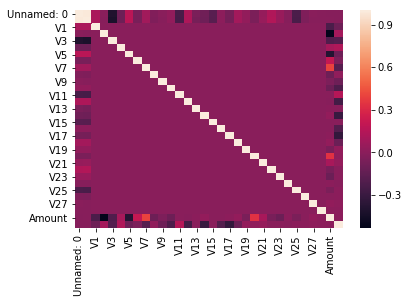

In [40]:
sns.heatmap(credit_card_data.corr())

### Observation
The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

## 7. Class counts

In [27]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Observation
Above is the Class counts for fradulent and non-fradulent transactions.

0 ->  Non-fradulent transactions

1 -> Fradulent transactions

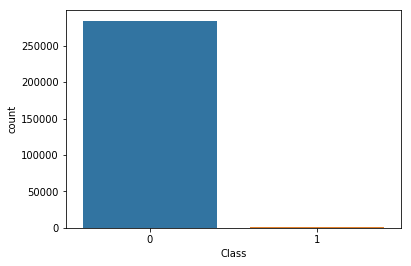

In [28]:
sns.countplot("Class",data=credit_card_data)

### Observation

The above graph represents the Class 0 and Class 1 transactions.

It can be observed that the Class 0(Non-fradulent transactions) are higher in number and Class 1(Fradulent transactions) are very minor in number.

Hence, the dataset is imbalanced and needs to be balanced for correct accuracies.

The two techniques for handling imbalanced data are:

a) Undersampling and

b) Oversampling

## 8. Number of true transactions every hour

In [35]:
# As the time provided is in seconds we can use it as seconds since epoch as we won't care about years
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);

timeAnalysis = credit_card_data[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# As the max time is 172792 seconds and 172792 / (60*60) is about 48 hrs so we only have data for 2 days so only 
# plotting data against hours make sense
timeAnalysis['hour of the day'] = timeAnalysis.datetime.dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()

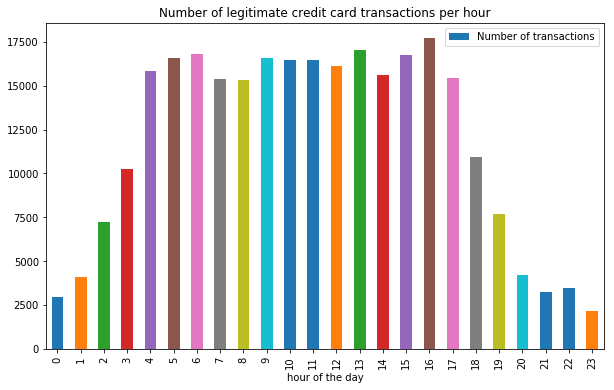

In [37]:
plt.figure(figsize = (10, 6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = 'Number of legitimate credit card transactions per hour', legend = True)

### Observation
The above histogram shows the number of true credit card transactions for every hour for 24 hours. The transactions are the highest at the 16th hour of the day.




## 9.Transactions during a certain time frame


In [44]:
Fraud = credit_card_data[credit_card_data['Class']==1]
Normal = credit_card_data[credit_card_data['Class']==0]

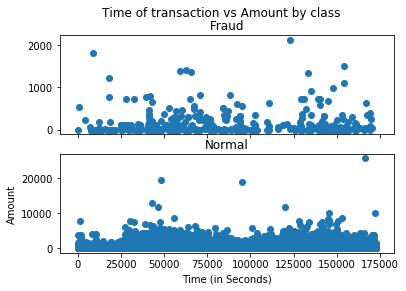

In [45]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Observation
The above scatter plot shows the Time of transaction vs Amount by class for fraud and non-fraud transactions.


## 10. Plotting histogram for each parameter

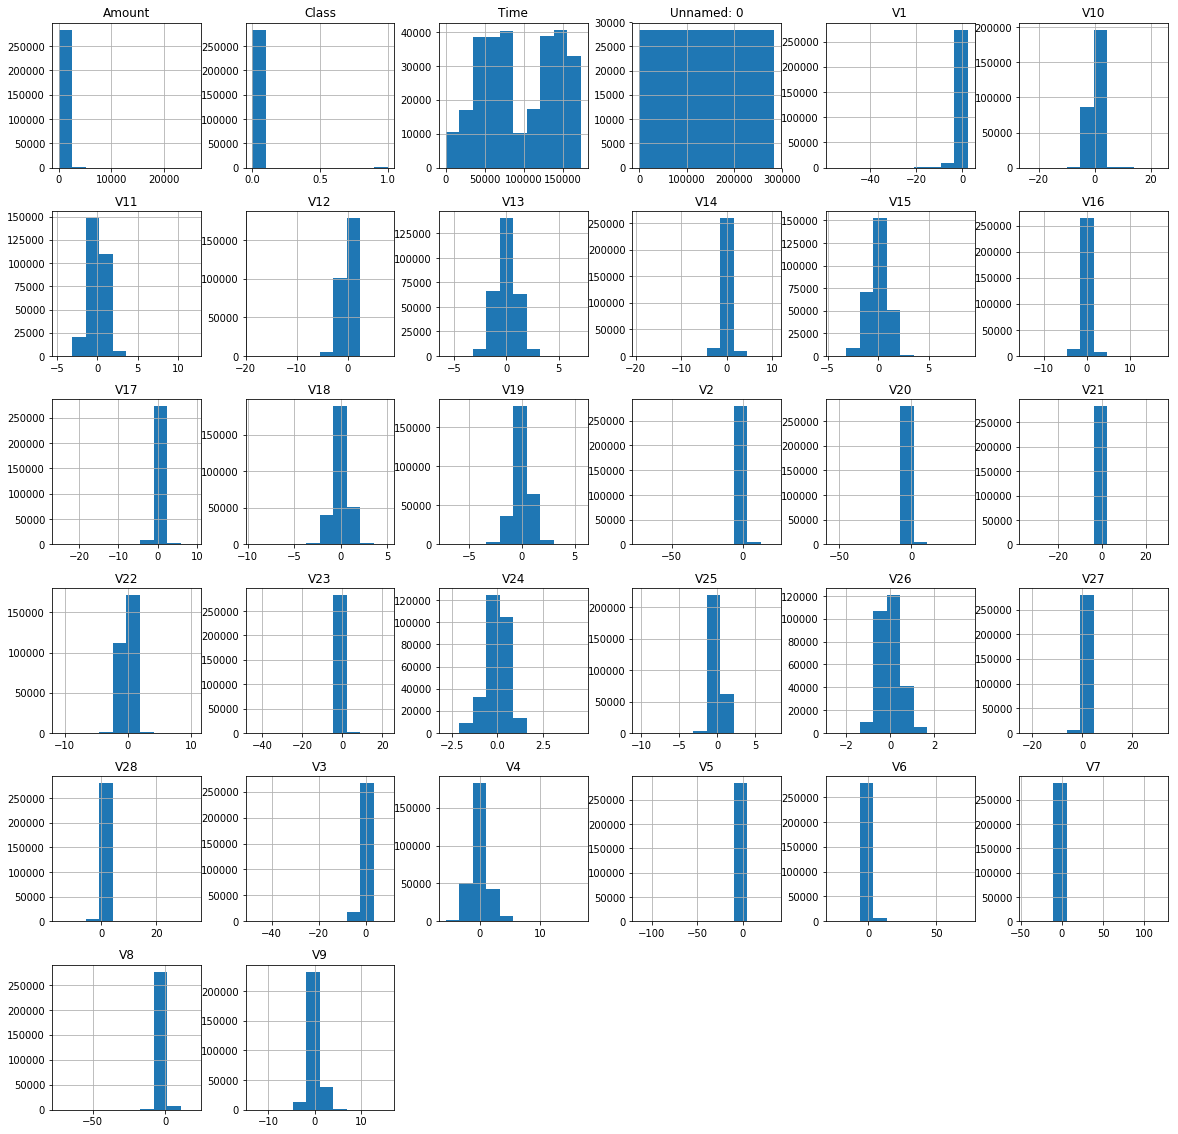

In [47]:
credit_card_data.hist(figsize=(20,20))
plt.show()